We are using R for analysis.


In [ ]:
#packages

library(rmgarch)
library(lmtest)
library(tseries)
library(forecast)
library(repr)
library(rugarch) # package for GARCH modelling
library(moments) # package for kurtosis estimation
library(aTSA) # package for ARCH-LM test

Installing package into 'C:/Users/fazol/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'gmp', 'Rmpfr', 'Bessel', 'ff', 'shape', 'pcaPP', 'corpcor'




package 'gmp' successfully unpacked and MD5 sums checked
package 'Rmpfr' successfully unpacked and MD5 sums checked
package 'Bessel' successfully unpacked and MD5 sums checked
package 'ff' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'pcaPP' successfully unpacked and MD5 sums checked
package 'corpcor' successfully unpacked and MD5 sums checked
package 'rmgarch' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fazol\AppData\Local\Temp\RtmpS4PqEM\downloaded_packages


Warning message:
"package 'rmgarch' was built under R version 4.4.3"
Warning message:
"package 'lmtest' was built under R version 4.4.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.4.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [36]:
data <- read.csv("Microsoft_data.csv")
data <- data[-c(1:2), ]

# Rename column 'price' to 'Date'
names(data)[names(data) == "Price"] <- "Date"
names(data)[names(data) == "Adj.Close"] <- "Price"
data <- data[, -c(3:7)]
data$Price <- as.numeric(data$Price)
head(data)

,Date,Price
,<chr>,<dbl>
3,2010-01-04,23.25406
4,2010-01-05,23.26156
5,2010-01-06,23.11880
6,2010-01-07,22.87838
7,2010-01-08,23.03616
8,2010-01-11,22.74315


In [37]:
data$log_ret <- c(NA, diff(log(data$Price)))
data <- na.omit(data)
length(data$log_ret)
# omit NAs
log_ret = na.omit(data$log_ret)
length(data$log_ret)
head(data)

[1] 3313

[1] 3313

,Date,Price,log_ret
,<chr>,<dbl>,<dbl>
4,2010-01-05,23.26156,0.0003227053
5,2010-01-06,23.11880,-0.0061558790
6,2010-01-07,22.87838,-0.0104538339
7,2010-01-08,23.03616,0.0068727811
8,2010-01-11,22.74315,-0.0128014351
9,2010-01-12,22.59287,-0.0066294634


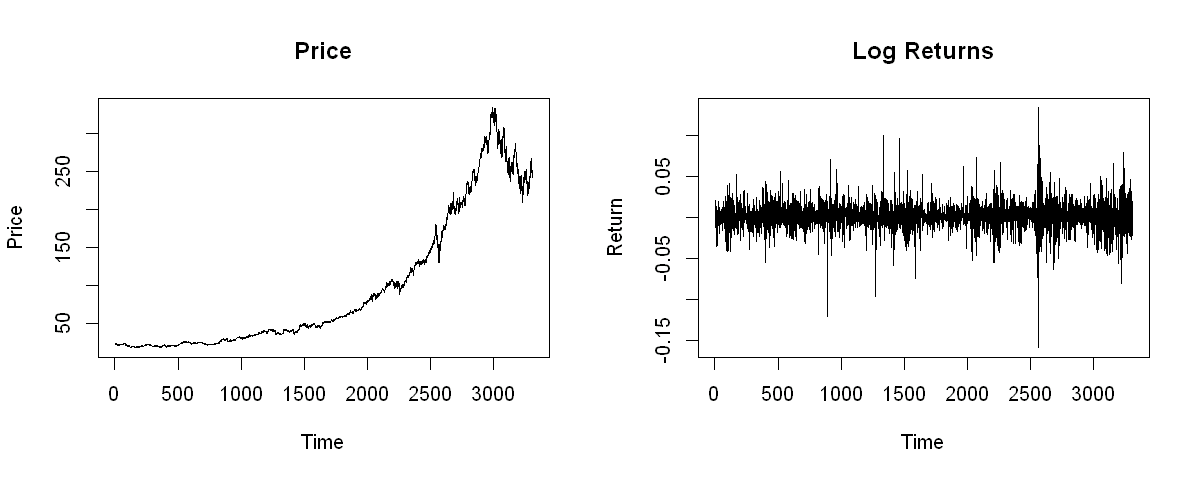

In [48]:
options(repr.plot.width=10, repr.plot.height=4)
par(mfrow = c(1,2))

# Original Price
ts.plot(data$Price, col = "black", main = "Price", ylab = "Price", xlab = "Time")

# Log Returns (if available)
ts.plot(data$log_ret, col = "black", main = "Log Returns", ylab = "Return", xlab = "Time")

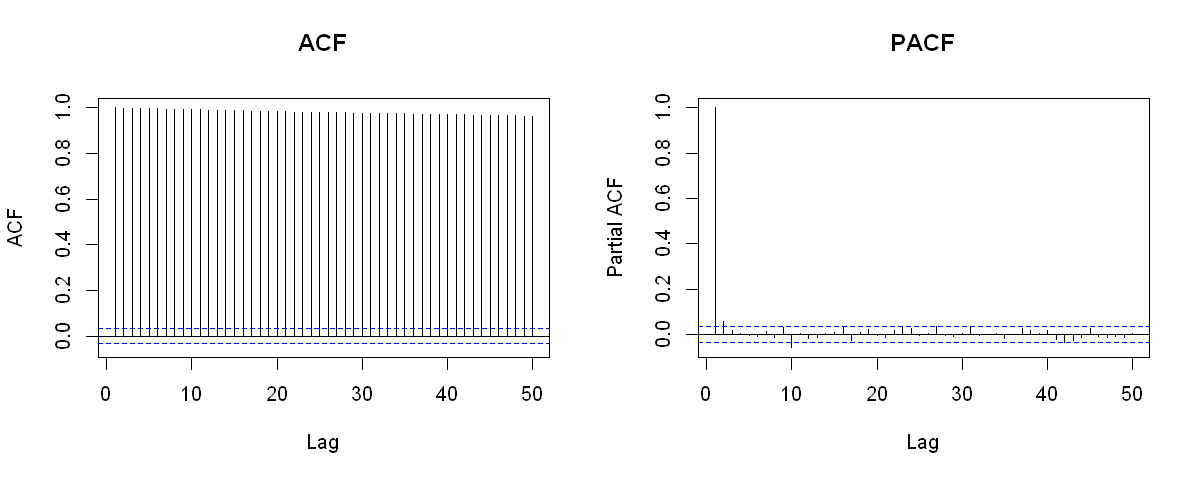

In [49]:
par(mfrow = c(1,2))
Acf(data$Price, lag.max = 50, main = "ACF")
Pacf(data$Price, lag.max = 50, main = "PACF")

We can see that price is not stationary variables

In [50]:
tseries::adf.test(data$Price)


	Augmented Dickey-Fuller Test

data:  data$Price
Dickey-Fuller = -1.7914, Lag order = 14, p-value = 0.6667
alternative hypothesis: stationary


Warning message in tseries::adf.test(data$log_ret):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  data$log_ret
Dickey-Fuller = -15.89, Lag order = 14, p-value = 0.01
alternative hypothesis: stationary


KPSS Unit Root Test 
alternative: nonstationary 
 
Type 1: no drift no trend 
 lag stat p.value
  13 2.89    0.01
----- 
 Type 2: with drift no trend 
 lag  stat p.value
  13 0.195     0.1
----- 
 Type 1: with drift and trend 
 lag  stat p.value
  13 0.107     0.1
----------- 
Note: p.value = 0.01 means p.value <= 0.01 
    : p.value = 0.10 means p.value >= 0.10 


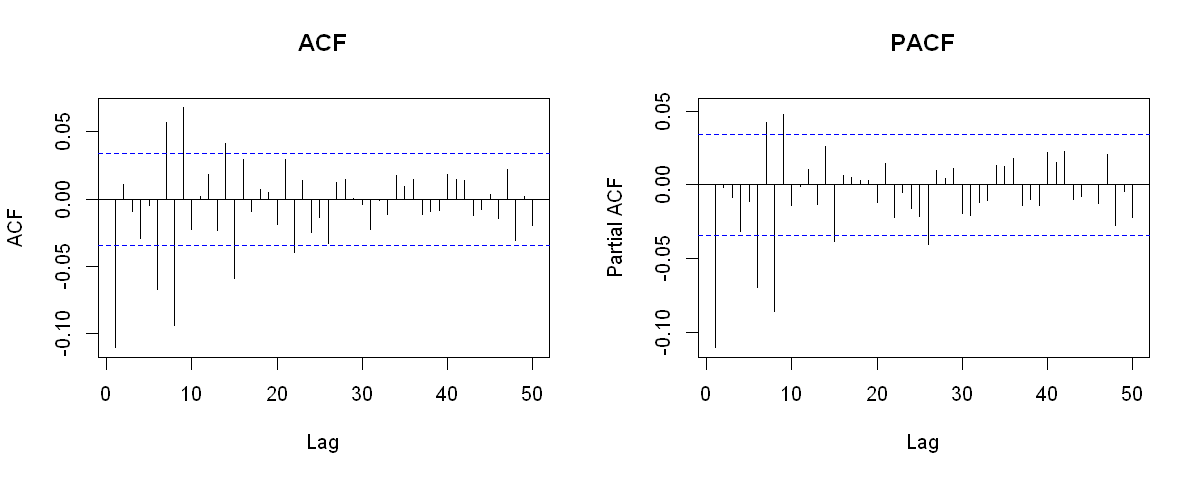

In [51]:
# ACF PACF plots
par(mfrow = c(1,2))
Acf(data$log_ret, lag.max = 50, main = "ACF")
Pacf(data$log_ret, lag.max = 50, main = "PACF")

#ADF test
tseries::adf.test(data$log_ret)

#KPSS test
kpss.test(data$log_ret)

Series: data$log_ret 
ARIMA(0,0,1) with zero mean 

Coefficients:
          ma1
      -0.1073
s.e.   0.0171

sigma^2 = 0.0002673:  log likelihood = 8927.67
AIC=-17851.33   AICc=-17851.33   BIC=-17839.12


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with zero mean
Q* = 59.238, df = 9, p-value = 1.88e-09

Model df: 1.   Total lags used: 10



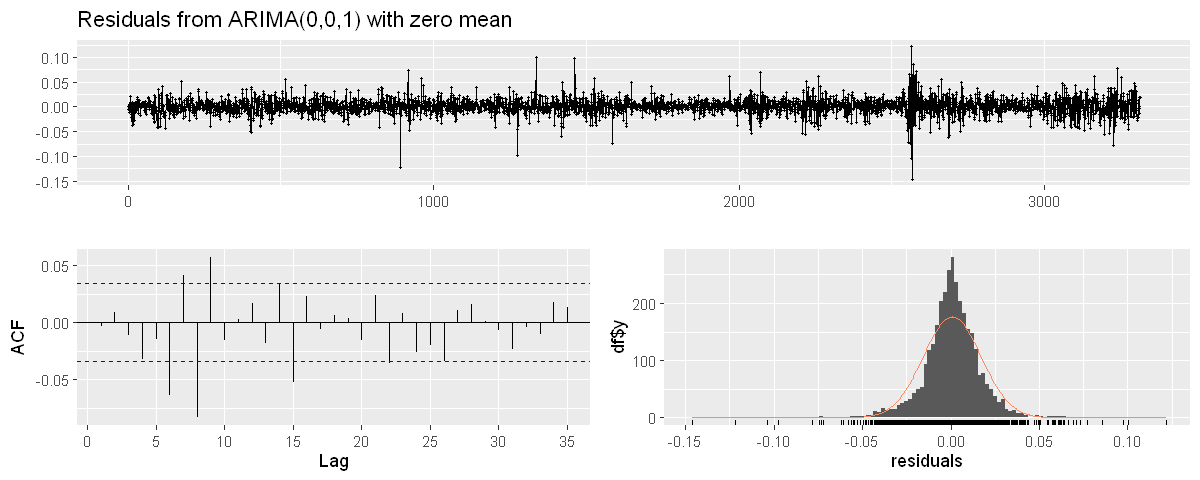

In [52]:
(fit_auto <- auto.arima(data$log_ret, ic = c("bic"), stationary = TRUE))
checkresiduals(fit_auto)

In [53]:
Box.test(fit_auto$residuals, lag = 20, type = c("Ljung-Box"))


	Box-Ljung test

data:  fit_auto$residuals
X-squared = 77.393, df = 20, p-value = 1.083e-08


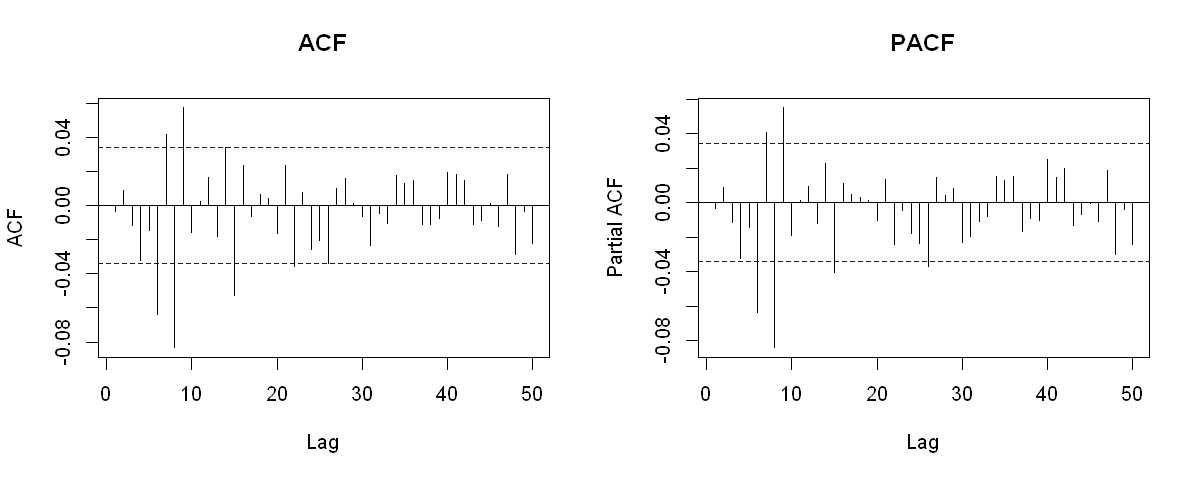

In [54]:
par(mfrow = c(1,2))
Acf(fit_auto$residuals, lag.max = 50, main = "ACF")
Pacf(fit_auto$residuals, lag.max = 50, main = "PACF")

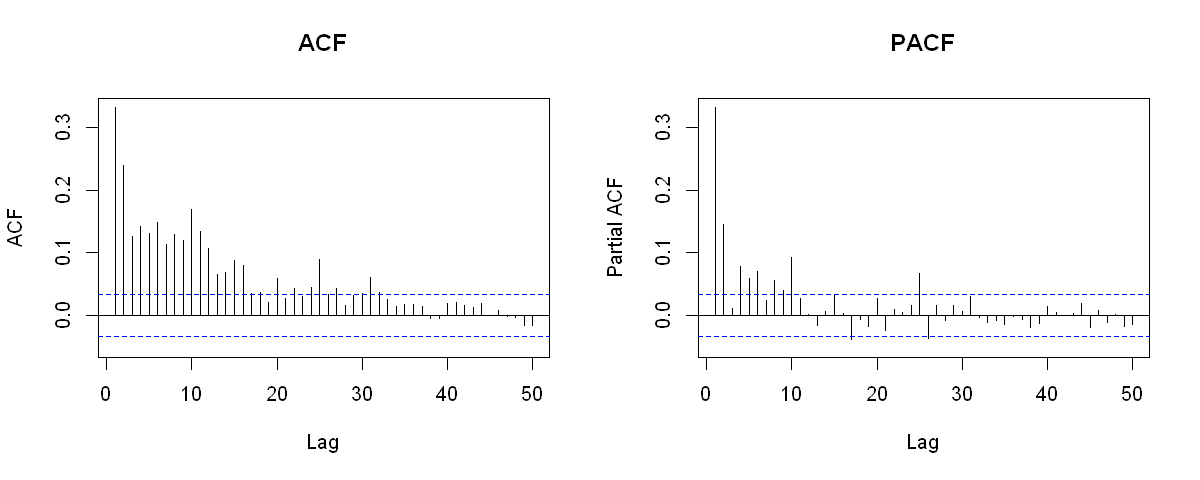

In [55]:
resid <- fit_auto$residuals
resid_sqrd <- resid^2 # create squared residuals
par(mfrow = c(1,2))
Acf(resid_sqrd, lag.max = 50, main = "ACF")
Pacf(resid_sqrd, lag.max = 50, main = "PACF")

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ p.value
[1,]     4  676       0
[2,]     8  904       0
[3,]    12 1142       0
[4,]    16 1218       0
[5,]    20 1239       0
[6,]    24 1257       0
Lagrange-Multiplier test: 
     order   LM p.value
[1,]     4 2653       0
[2,]     8 1232       0
[3,]    12  770       0
[4,]    16  573       0
[5,]    20  454       0
[6,]    24  375       0


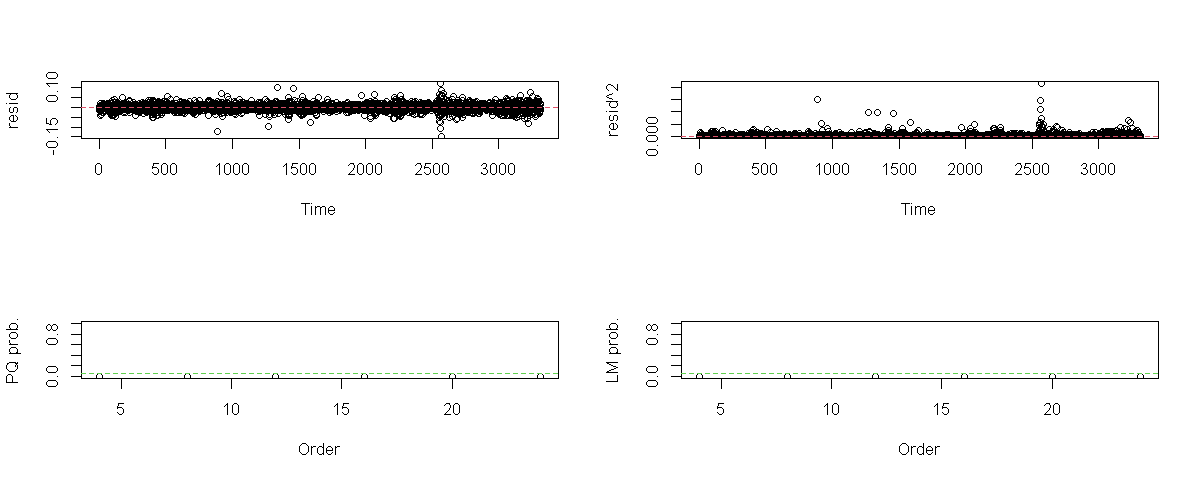

In [57]:
arch.test(arima(data$log_ret,order = c(0,0,1)))

In [ ]:
library(FinTS)
ArchTest(resid, lags = 12, demean = FALSE)

Installing package into 'C:/Users/fazol/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'FinTS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fazol\AppData\Local\Temp\RtmpS4PqEM\downloaded_packages


Warning message:
"package 'FinTS' was built under R version 4.4.3"

Attaching package: 'FinTS'


The following object is masked from 'package:forecast':

    Acf





	ARCH LM-test; Null hypothesis: no ARCH effects

data:  resid
Chi-squared = 507.79, df = 12, p-value < 2.2e-16


Now we are sure that there are ARCH/GARCH effects present in our Data

In [62]:
# specify the model that we want to estimate
model_specification <- ugarchspec(mean.model = list(armaOrder = c(0, 1), include.mean = TRUE), 
                      variance.model = list(garchOrder = c(1, 1)))

# estimate the model
fit <- ugarchfit(spec = model_specification, data = data$log_ret)
#infocriteria(fit)


coef(fit)
fit


mu           ma1         omega        alpha1         beta1 
 1.031818e-03 -4.365361e-02  1.871796e-05  1.292431e-01  8.032875e-01


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001032    0.000230   4.4929 0.000007
ma1    -0.043654    0.020019  -2.1806 0.029210
omega   0.000019    0.000004   4.7125 0.000002
alpha1  0.129243    0.021721   5.9501 0.000000
beta1   0.803288    0.032044  25.0681 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001032    0.000225   4.5769 0.000005
ma1    -0.043654    0.022324  -1.9554 0.050531
omega   0.000019    0.000009   2.0194 0.043443
alpha1  0.129243    0.045808   2.8214 0.004781
beta1   0.803288    0.071026  11.3097 0.000000

LogLikelihood : 9212.841 

Information Criteria
------------------------------------
                

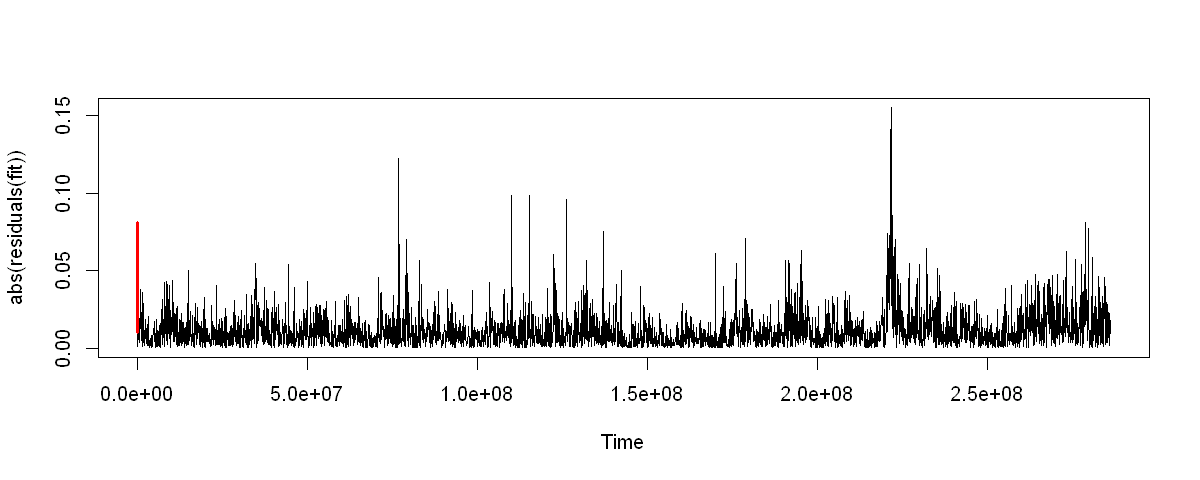

In [64]:
#plot.ts(abs(log_ret))
plot.ts(abs(residuals(fit))) # residuals (after fitting arma model) or log_ret in absolute values
lines(as.numeric(sigma(fit)),col = "red", lwd = 3) 
# plot of the residuals/log returns in absolute value and of estimated conditional standard deviation (volatility)